In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns=["EIN", "NAME"])
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
# Determine the number of unique values in each column.
app_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
application_df[app_cat].nunique()

APPLICATION_TYPE          17
AFFILIATION                6
CLASSIFICATION            71
USE_CASE                   5
ORGANIZATION               4
INCOME_AMT                 9
SPECIAL_CONSIDERATIONS     2
dtype: int64

In [4]:
# Look at APPLICATION_TYPE value counts for binning
app_type_count = application_df.APPLICATION_TYPE.value_counts()
app_type_count

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T14        3
T25        3
T15        2
T29        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

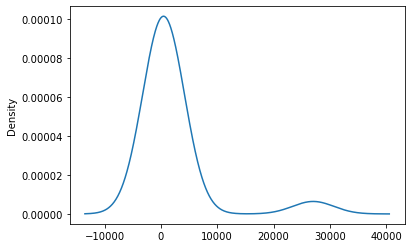

In [5]:
# Visualize the value counts of APPLICATION_TYPE
app_type_count.plot.density()

In [6]:
# Determine which values to replace if counts are less than ...?
replace_application = list(app_type_count[app_type_count < 500].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [7]:
# Look at CLASSIFICATION value counts for binning
app_class_counts = application_df.CLASSIFICATION.value_counts()
app_class_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C6100        1
C2561        1
C1370        1
C1248        1
C2170        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [8]:
# Determine which values to replace if counts are less than ..?
replace_class = list(app_class_counts[app_class_counts < 1750].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [9]:
# Generate our categorical variable lists
app_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
application_df[app_cat].nunique()

APPLICATION_TYPE          9
AFFILIATION               6
CLASSIFICATION            6
USE_CASE                  5
ORGANIZATION              4
INCOME_AMT                9
SPECIAL_CONSIDERATIONS    2
dtype: int64

In [10]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[app_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(app_cat)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [11]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df,left_index=True, right_index=True)
application_df = application_df.drop(app_cat,1)
application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [12]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop(["IS_SUCCESSFUL"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=28)

In [13]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [23]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
# hidden_nodes_layer1 =  12
# hidden_nodes_layer2 = 6
hidden_nodes_layer1 = 50
#hidden_nodes_layer2 = 40

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
#nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 50)                2200      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 51        
Total params: 2,251
Trainable params: 2,251
Non-trainable params: 0
_________________________________________________________________


In [24]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints_optimized_v3/",exist_ok=True)
checkpoint_path = "checkpoints_optimized_v3/weights.{epoch:02d}.hdf5"

In [25]:

# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [26]:
# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=4000)

# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100, callbacks=[cp_callback])

Train on 25724 samples
Epoch 1/100


 2784/25724 [==>...........................] - ETA: 5s - loss: 0.6447 - accuracy: 0.6448 
Epoch 00001: saving model to checkpoints_optimized_v3/weights.01.hdf5
 6848/25724 [======>.......................] - ETA: 2s - loss: 0.6093 - accuracy: 0.6885
Epoch 00001: saving model to checkpoints_optimized_v3/weights.01.hdf5
11712/25724 [============>.................] - ETA: 1s - loss: 0.5930 - accuracy: 0.7028
Epoch 00001: saving model to checkpoints_optimized_v3/weights.01.hdf5
15776/25724 [=================>............] - ETA: 0s - loss: 0.5862 - accuracy: 0.7088
Epoch 00001: saving model to checkpoints_optimized_v3/weights.01.hdf5
19680/25724 [=====================>........] - ETA: 0s - loss: 0.5836 - accuracy: 0.7115
Epoch 00001: saving model to checkpoints_optimized_v3/weights.01.hdf5
23744/25724 [==========================>...] - ETA: 0s - loss: 0.5800 - accuracy: 0.7135
Epoch 00001: saving model to checkpoints_optimized_v3/weights.01.hdf5
25724/25724 [==============================] 

   32/25724 [..............................] - ETA: 1s - loss: 0.5163 - accuracy: 0.7188
Epoch 00008: saving model to checkpoints_optimized_v3/weights.08.hdf5
 4064/25724 [===>..........................] - ETA: 0s - loss: 0.5445 - accuracy: 0.7340
Epoch 00008: saving model to checkpoints_optimized_v3/weights.08.hdf5
 6816/25724 [======>.......................] - ETA: 0s - loss: 0.5491 - accuracy: 0.7312
Epoch 00008: saving model to checkpoints_optimized_v3/weights.08.hdf5
10944/25724 [===========>..................] - ETA: 0s - loss: 0.5480 - accuracy: 0.7331
Epoch 00008: saving model to checkpoints_optimized_v3/weights.08.hdf5
15104/25724 [================>.............] - ETA: 0s - loss: 0.5515 - accuracy: 0.7305
Epoch 00008: saving model to checkpoints_optimized_v3/weights.08.hdf5
19264/25724 [=====================>........] - ETA: 0s - loss: 0.5519 - accuracy: 0.7302
Epoch 00008: saving model to checkpoints_optimized_v3/weights.08.hdf5
23392/25724 [==========================>...] -

 8192/25724 [========>.....................] - ETA: 0s - loss: 0.5469 - accuracy: 0.7335
Epoch 00015: saving model to checkpoints_optimized_v3/weights.15.hdf5
10848/25724 [===========>..................] - ETA: 0s - loss: 0.5478 - accuracy: 0.7307
Epoch 00015: saving model to checkpoints_optimized_v3/weights.15.hdf5
15072/25724 [================>.............] - ETA: 0s - loss: 0.5470 - accuracy: 0.7316
Epoch 00015: saving model to checkpoints_optimized_v3/weights.15.hdf5
19168/25724 [=====================>........] - ETA: 0s - loss: 0.5458 - accuracy: 0.7316
Epoch 00015: saving model to checkpoints_optimized_v3/weights.15.hdf5
23296/25724 [==========================>...] - ETA: 0s - loss: 0.5478 - accuracy: 0.7314
Epoch 00015: saving model to checkpoints_optimized_v3/weights.15.hdf5
25724/25724 [==============================] - 1s 39us/sample - loss: 0.5482 - accuracy: 0.7320
Epoch 16/100
 1408/25724 [>.............................] - ETA: 0s - loss: 0.5496 - accuracy: 0.7308
Epoch 0

16320/25724 [==================>...........] - ETA: 0s - loss: 0.5458 - accuracy: 0.7322
Epoch 00022: saving model to checkpoints_optimized_v3/weights.22.hdf5
19104/25724 [=====================>........] - ETA: 0s - loss: 0.5481 - accuracy: 0.7295
Epoch 00022: saving model to checkpoints_optimized_v3/weights.22.hdf5
23264/25724 [==========================>...] - ETA: 0s - loss: 0.5475 - accuracy: 0.7304
Epoch 00022: saving model to checkpoints_optimized_v3/weights.22.hdf5
25724/25724 [==============================] - 1s 37us/sample - loss: 0.5470 - accuracy: 0.7313
Epoch 23/100
 1440/25724 [>.............................] - ETA: 0s - loss: 0.5372 - accuracy: 0.7410
Epoch 00023: saving model to checkpoints_optimized_v3/weights.23.hdf5
 5664/25724 [=====>........................] - ETA: 0s - loss: 0.5514 - accuracy: 0.7279
Epoch 00023: saving model to checkpoints_optimized_v3/weights.23.hdf5
 9728/25724 [==========>...................] - ETA: 0s - loss: 0.5477 - accuracy: 0.7305
Epoch 0

23520/25724 [==========================>...] - ETA: 0s - loss: 0.5448 - accuracy: 0.7319
Epoch 00029: saving model to checkpoints_optimized_v3/weights.29.hdf5
25724/25724 [==============================] - 1s 39us/sample - loss: 0.5459 - accuracy: 0.7313
Epoch 30/100
 2688/25724 [==>...........................] - ETA: 0s - loss: 0.5569 - accuracy: 0.7225
Epoch 00030: saving model to checkpoints_optimized_v3/weights.30.hdf5
 6496/25724 [======>.......................] - ETA: 0s - loss: 0.5494 - accuracy: 0.7328
Epoch 00030: saving model to checkpoints_optimized_v3/weights.30.hdf5
10624/25724 [===========>..................] - ETA: 0s - loss: 0.5482 - accuracy: 0.7326
Epoch 00030: saving model to checkpoints_optimized_v3/weights.30.hdf5
13376/25724 [==============>...............] - ETA: 0s - loss: 0.5495 - accuracy: 0.7306
Epoch 00030: saving model to checkpoints_optimized_v3/weights.30.hdf5
18624/25724 [====================>.........] - ETA: 0s - loss: 0.5505 - accuracy: 0.7293
Epoch 0

 6464/25724 [======>.......................] - ETA: 0s - loss: 0.5438 - accuracy: 0.7348
Epoch 00037: saving model to checkpoints_optimized_v3/weights.37.hdf5
10560/25724 [===========>..................] - ETA: 0s - loss: 0.5401 - accuracy: 0.7392
Epoch 00037: saving model to checkpoints_optimized_v3/weights.37.hdf5
14752/25724 [================>.............] - ETA: 0s - loss: 0.5406 - accuracy: 0.7392
Epoch 00037: saving model to checkpoints_optimized_v3/weights.37.hdf5
18368/25724 [====================>.........] - ETA: 0s - loss: 0.5428 - accuracy: 0.7355
Epoch 00037: saving model to checkpoints_optimized_v3/weights.37.hdf5
22080/25724 [========================>.....] - ETA: 0s - loss: 0.5439 - accuracy: 0.7341
Epoch 00037: saving model to checkpoints_optimized_v3/weights.37.hdf5
25724/25724 [==============================] - 1s 39us/sample - loss: 0.5446 - accuracy: 0.7321
Epoch 38/100
   32/25724 [..............................] - ETA: 1s - loss: 0.5691 - accuracy: 0.6562
Epoch 0

10720/25724 [===========>..................] - ETA: 0s - loss: 0.5423 - accuracy: 0.7332
Epoch 00044: saving model to checkpoints_optimized_v3/weights.44.hdf5
14816/25724 [================>.............] - ETA: 0s - loss: 0.5432 - accuracy: 0.7337
Epoch 00044: saving model to checkpoints_optimized_v3/weights.44.hdf5
18784/25724 [====================>.........] - ETA: 0s - loss: 0.5445 - accuracy: 0.7321
Epoch 00044: saving model to checkpoints_optimized_v3/weights.44.hdf5
22688/25724 [=========================>....] - ETA: 0s - loss: 0.5437 - accuracy: 0.7329
Epoch 00044: saving model to checkpoints_optimized_v3/weights.44.hdf5
25724/25724 [==============================] - 1s 38us/sample - loss: 0.5443 - accuracy: 0.7327
Epoch 45/100
   32/25724 [..............................] - ETA: 1s - loss: 0.6634 - accuracy: 0.6250
Epoch 00045: saving model to checkpoints_optimized_v3/weights.45.hdf5
 4224/25724 [===>..........................] - ETA: 0s - loss: 0.5539 - accuracy: 0.7270
Epoch 0

18656/25724 [====================>.........] - ETA: 0s - loss: 0.5439 - accuracy: 0.7342
Epoch 00051: saving model to checkpoints_optimized_v3/weights.51.hdf5
22656/25724 [=========================>....] - ETA: 0s - loss: 0.5442 - accuracy: 0.7332
Epoch 00051: saving model to checkpoints_optimized_v3/weights.51.hdf5
25724/25724 [==============================] - 1s 38us/sample - loss: 0.5436 - accuracy: 0.7336
Epoch 52/100
 1376/25724 [>.............................] - ETA: 0s - loss: 0.5362 - accuracy: 0.7311
Epoch 00052: saving model to checkpoints_optimized_v3/weights.52.hdf5
 5472/25724 [=====>........................] - ETA: 0s - loss: 0.5373 - accuracy: 0.7361
Epoch 00052: saving model to checkpoints_optimized_v3/weights.52.hdf5
 8256/25724 [========>.....................] - ETA: 0s - loss: 0.5356 - accuracy: 0.7380
Epoch 00052: saving model to checkpoints_optimized_v3/weights.52.hdf5
12288/25724 [=============>................] - ETA: 0s - loss: 0.5410 - accuracy: 0.7356
Epoch 0

25724/25724 [==============================] - 1s 40us/sample - loss: 0.5432 - accuracy: 0.7342
Epoch 59/100
 1248/25724 [>.............................] - ETA: 1s - loss: 0.5383 - accuracy: 0.7332
Epoch 00059: saving model to checkpoints_optimized_v3/weights.59.hdf5
 5376/25724 [=====>........................] - ETA: 0s - loss: 0.5370 - accuracy: 0.7340
Epoch 00059: saving model to checkpoints_optimized_v3/weights.59.hdf5
 9504/25724 [==========>...................] - ETA: 0s - loss: 0.5395 - accuracy: 0.7333
Epoch 00059: saving model to checkpoints_optimized_v3/weights.59.hdf5
12288/25724 [=============>................] - ETA: 0s - loss: 0.5374 - accuracy: 0.7354
Epoch 00059: saving model to checkpoints_optimized_v3/weights.59.hdf5
16352/25724 [==================>...........] - ETA: 0s - loss: 0.5413 - accuracy: 0.7345
Epoch 00059: saving model to checkpoints_optimized_v3/weights.59.hdf5
20608/25724 [=======================>......] - ETA: 0s - loss: 0.5429 - accuracy: 0.7337
Epoch 0

 5344/25724 [=====>........................] - ETA: 0s - loss: 0.5420 - accuracy: 0.7322
Epoch 00066: saving model to checkpoints_optimized_v3/weights.66.hdf5
 9472/25724 [==========>...................] - ETA: 0s - loss: 0.5389 - accuracy: 0.7332
Epoch 00066: saving model to checkpoints_optimized_v3/weights.66.hdf5
13632/25724 [==============>...............] - ETA: 0s - loss: 0.5395 - accuracy: 0.7352
Epoch 00066: saving model to checkpoints_optimized_v3/weights.66.hdf5
16416/25724 [==================>...........] - ETA: 0s - loss: 0.5415 - accuracy: 0.7348
Epoch 00066: saving model to checkpoints_optimized_v3/weights.66.hdf5
21728/25724 [========================>.....] - ETA: 0s - loss: 0.5410 - accuracy: 0.7353
Epoch 00066: saving model to checkpoints_optimized_v3/weights.66.hdf5
25724/25724 [==============================] - 1s 38us/sample - loss: 0.5425 - accuracy: 0.7341
Epoch 67/100
   32/25724 [..............................] - ETA: 1s - loss: 0.5779 - accuracy: 0.7188
Epoch 0

13024/25724 [==============>...............] - ETA: 0s - loss: 0.5422 - accuracy: 0.7353
Epoch 00073: saving model to checkpoints_optimized_v3/weights.73.hdf5
17184/25724 [===================>..........] - ETA: 0s - loss: 0.5436 - accuracy: 0.7356
Epoch 00073: saving model to checkpoints_optimized_v3/weights.73.hdf5
21408/25724 [=======================>......] - ETA: 0s - loss: 0.5439 - accuracy: 0.7339
Epoch 00073: saving model to checkpoints_optimized_v3/weights.73.hdf5
25724/25724 [==============================] - 1s 38us/sample - loss: 0.5419 - accuracy: 0.7346
Epoch 74/100
   32/25724 [..............................] - ETA: 1s - loss: 0.5603 - accuracy: 0.6250
Epoch 00074: saving model to checkpoints_optimized_v3/weights.74.hdf5
 4128/25724 [===>..........................] - ETA: 0s - loss: 0.5415 - accuracy: 0.7381
Epoch 00074: saving model to checkpoints_optimized_v3/weights.74.hdf5
 8064/25724 [========>.....................] - ETA: 0s - loss: 0.5388 - accuracy: 0.7387
Epoch 0

17312/25724 [===================>..........] - ETA: 0s - loss: 0.5423 - accuracy: 0.7346
Epoch 00080: saving model to checkpoints_optimized_v3/weights.80.hdf5
21344/25724 [=======================>......] - ETA: 0s - loss: 0.5447 - accuracy: 0.7321
Epoch 00080: saving model to checkpoints_optimized_v3/weights.80.hdf5
25724/25724 [==============================] - 1s 38us/sample - loss: 0.5426 - accuracy: 0.7336
Epoch 81/100
   32/25724 [..............................] - ETA: 1s - loss: 0.4459 - accuracy: 0.8438
Epoch 00081: saving model to checkpoints_optimized_v3/weights.81.hdf5
 3872/25724 [===>..........................] - ETA: 0s - loss: 0.5347 - accuracy: 0.7425
Epoch 00081: saving model to checkpoints_optimized_v3/weights.81.hdf5
 7840/25724 [========>.....................] - ETA: 0s - loss: 0.5354 - accuracy: 0.7421
Epoch 00081: saving model to checkpoints_optimized_v3/weights.81.hdf5
12064/25724 [=============>................] - ETA: 0s - loss: 0.5441 - accuracy: 0.7332
Epoch 0

25724/25724 [==============================] - 1s 37us/sample - loss: 0.5416 - accuracy: 0.7355
Epoch 88/100
   32/25724 [..............................] - ETA: 1s - loss: 0.5199 - accuracy: 0.7812
Epoch 00088: saving model to checkpoints_optimized_v3/weights.88.hdf5
 4288/25724 [====>.........................] - ETA: 0s - loss: 0.5253 - accuracy: 0.7488
Epoch 00088: saving model to checkpoints_optimized_v3/weights.88.hdf5
 8160/25724 [========>.....................] - ETA: 0s - loss: 0.5259 - accuracy: 0.7480
Epoch 00088: saving model to checkpoints_optimized_v3/weights.88.hdf5
12192/25724 [=============>................] - ETA: 0s - loss: 0.5346 - accuracy: 0.7400
Epoch 00088: saving model to checkpoints_optimized_v3/weights.88.hdf5
16416/25724 [==================>...........] - ETA: 0s - loss: 0.5396 - accuracy: 0.7378
Epoch 00088: saving model to checkpoints_optimized_v3/weights.88.hdf5
20288/25724 [======================>.......] - ETA: 0s - loss: 0.5411 - accuracy: 0.7360
Epoch 0

 4000/25724 [===>..........................] - ETA: 0s - loss: 0.5523 - accuracy: 0.7207
Epoch 00095: saving model to checkpoints_optimized_v3/weights.95.hdf5
 7616/25724 [=======>......................] - ETA: 0s - loss: 0.5449 - accuracy: 0.7274
Epoch 00095: saving model to checkpoints_optimized_v3/weights.95.hdf5
11744/25724 [============>.................] - ETA: 0s - loss: 0.5422 - accuracy: 0.7311
Epoch 00095: saving model to checkpoints_optimized_v3/weights.95.hdf5
15968/25724 [=================>............] - ETA: 0s - loss: 0.5414 - accuracy: 0.7329
Epoch 00095: saving model to checkpoints_optimized_v3/weights.95.hdf5
19776/25724 [======================>.......] - ETA: 0s - loss: 0.5408 - accuracy: 0.7346
Epoch 00095: saving model to checkpoints_optimized_v3/weights.95.hdf5
23264/25724 [==========================>...] - ETA: 0s - loss: 0.5418 - accuracy: 0.7340
Epoch 00095: saving model to checkpoints_optimized_v3/weights.95.hdf5
25724/25724 [==============================] -

In [27]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8575/1 - 0s - loss: 0.5488 - accuracy: 0.7331
Loss: 0.5512536074051704, Accuracy: 0.7330612540245056


In [ ]:
# Export our model to HDF5 file
nn.save("trained_optimized.h5")